# Projekt ML, eksploracyjna analiza danych

Celem tej sekcji jest **poznanie struktury zbioru `cars.csv`** oraz szybkie wykrycie potencjalnych problemów (braki danych, nietypowe wartości, silne korelacje).  
W szczególności sprawdzamy:

1. **Typy i zakresy zmiennych** (`df.info()`, `describe()`),  

2. **Rozkłady liczbowych cech** – histogramy i boxploty,  

3. **Relacje między cechami a celem (`mpg`)** – korelacje i pairplot,  

4. **Odstające obserwacje (outliers)** – wizualnie i metodą IQR.

Wyniki tej eksploracji pomogą podjąć decyzje w kolejnych etapach: czyszczenie danych, wybór cech i dobór modeli ML.


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv('../data/cars.csv')
df["origin"].unique()

array([1, 3, 2])

In [34]:
# wykresy w notebooku oraz ich jakość
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
cylinders,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
displacement,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
acceleration,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
year,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0
origin,392.0,1.576531,0.805518,1.0,1.000,1.00,2.000,3.0


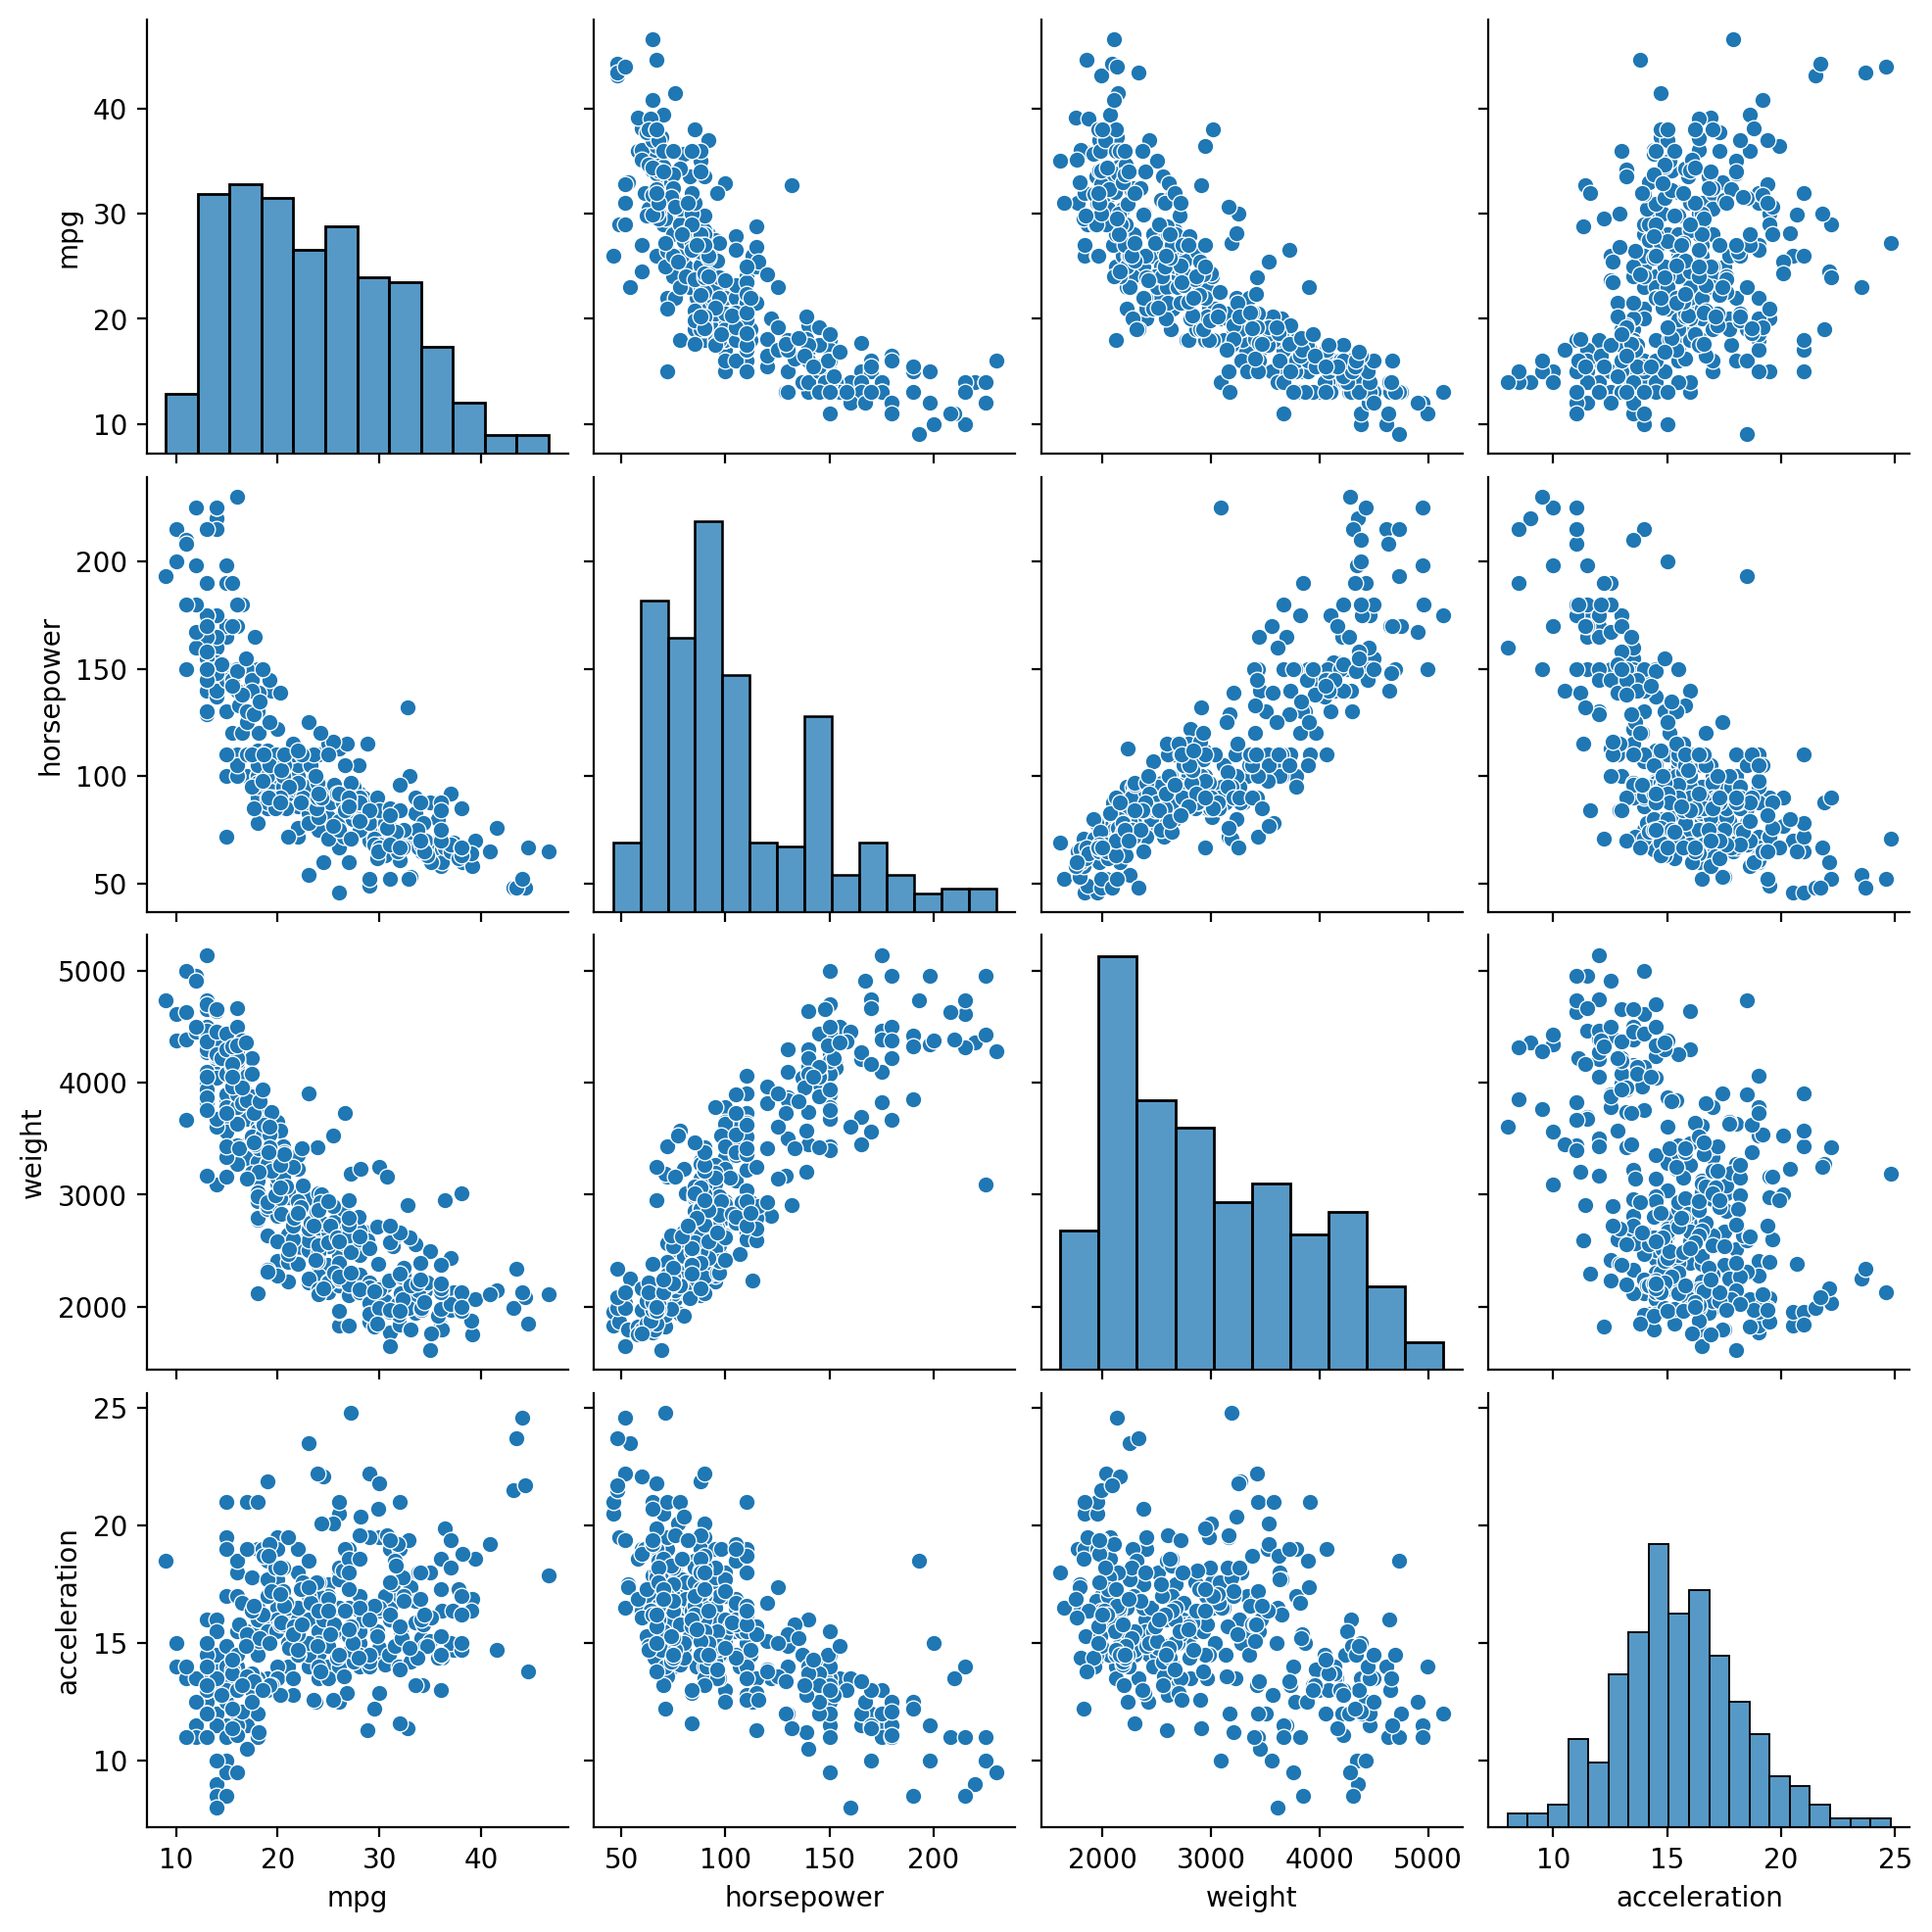

In [36]:
sns.pairplot(df[['mpg','horsepower','weight','acceleration']]);

<Axes: >

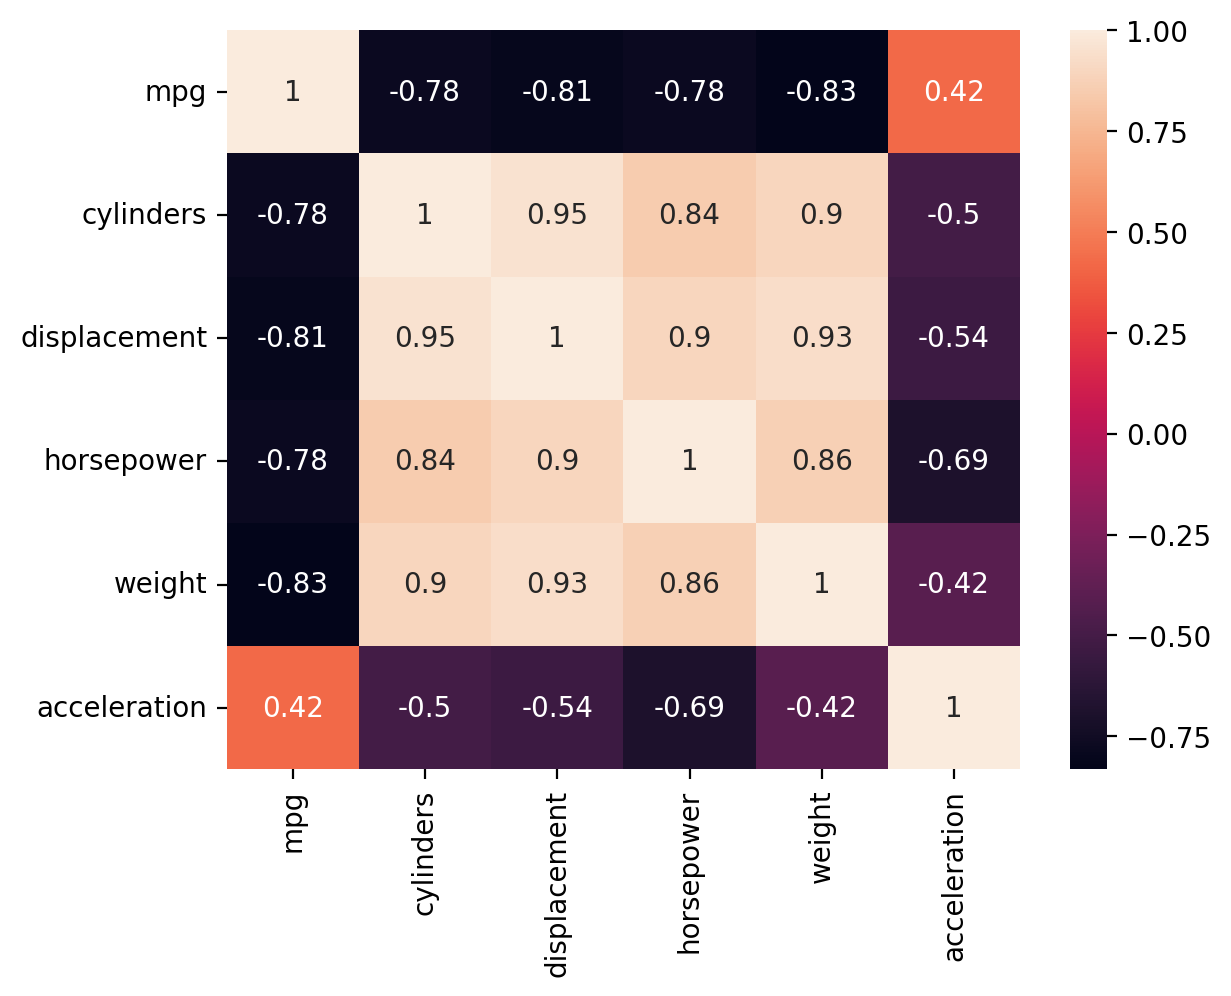

In [ ]:
sns.heatmap(df.select_dtypes(include=[np.number]).drop(columns=['year','origin'], errors='ignore').corr(), annot=True)

### Wnioski z analiz EDA

* **Braki danych:** W zbiorze nie stwierdzono braków (`NaN`).  

* **Outliery:** Odstające wartości zidentyfikowano głównie w `weight` i `horsepower` (pojazdy ekstremalnie ciężkie lub mocne). Usunięcie ok. 17 rekordów (IQR ± 1.5) poprawi symetrię rozkładów.  

* **Korelacje z `mpg`:**
  - Najsilniejsza **ujemna** korelacja: `weight → mpg` (‑0.83)  
  - Zauważalna **dodatnia** korelacja: `acceleration → mpg` (0.42)  
  - `cylinders` ma charakter dyskretny.

* **Zmienne kategoryczne:** `origin` (region produkcji) może wnosić informację.

* **Hipoteza robocza:** Lżejsze i słabsze samochody mają wyższy MPG; w modelach drzewiastych oczekujemy, że `weight` będzie cechą dominującą.

Na podstawie powyższych obserwacji przechodzimy do etapu **preprocessingu**:  
1) usuwamy wykryte outliery, 
2) stosujemy porównianie One‑Hot‐Encoding oraz pozostawienia wartości liczbowych dla `origin` i `cylinders`, 
3) skalujemy cechy liczbowe przy użyciu `StandardScaler`.

## Wnioski na podstawie analizy danych

1. **Zmienność danych**: Zbiór danych zawiera 392 rekordy dotyczące samochodów, z informacjami liczbowymi (np. moc, masa, przyspieszenie) oraz kategorycznymi (np. pochodzenie, nazwa).

2. **Zależności między cechami**: Wstępna analiza korelacji i wykresów wskazuje, że największy wpływ na zużycie paliwa (mpg) mają takie cechy jak masa pojazdu (weight), moc silnika (horsepower) oraz pojemność silnika (displacement). Widać wyraźną zależność: im większa masa i moc, tym wyższe zużycie paliwa.

3. **Rola cech kategorycznych**: Kolumna 'origin' (pochodzenie) może mieć wpływ na zużycie paliwa, co warto sprawdzić w dalszej analizie, np. poprzez zakodowanie tej cechy.

4. **Jakość danych**: Brakujące wartości nie występują, co ułatwia dalsze przetwarzanie i modelowanie.

5. **Potencjał predykcyjny**: Dane są dobrze przygotowane do zastosowania regresji i innych algorytmów ML w celu przewidywania zużycia paliwa na podstawie pozostałych cech.

6. **Nazwy pojazdów**: Kolumna 'name' może być wykorzystana do bardziej zaawansowanych analiz, np. ekstrakcji dodatkowych cech lub testowania wpływu tekstu na predykcję.

Podsumowując, zbiór danych jest kompletny i zawiera cechy istotne dla przewidywania zużycia paliwa, co pozwala na przeprowadzenie skutecznej analizy regresyjnej.